# Web scraping and salary predictions

I'm pretty sure everyone doing any kind of data science course has tried their hands at this project and it makes perfect sense when you go through it: 
   a) building webscrapers? Fun.
   b) building webscrapers to collect a tonne of data on various jobs and salaries? Useful and fun
   c) NLP on top of all of that? A data geek's dream come true. 
   
I approached this project with the goal of building as concise a scraper as I could (and ideally one that would also clean the data I was scraping before saving it in a dataframe). 

I scraped Indeed, and I focused on collecting location, job title, job summary, salaries from each listing. I searched through a bunch of highly populated cities, cities that have a high proportion of tech-related jobs, and then widened my search to run through every state in the US (and DC).

I ran my scraper every day to collect all new jobs that were aggregated and discarded any duplicate listings.

In [3]:
import requests
import bs4
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd

In [6]:
#here's a list of states
state_list = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
              'IL', 'IN', 'IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH',
              'NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
#list of cities I looked at:
city = ['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh',
        'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', 'Washington+DC', 'Boston', 'San+Antonio',
        'San+Diego', 'San+Jose', 'Detroit', 'Charlotte', 'Palo+Alto', 'Raleigh',
        'St+Louis','Redmond', 'Cincinnati','Tampa','Mountain+View', 'Morrisville','Menlo+Park','Princeton']

In [4]:
import requests

In [5]:
import time

In [6]:
from selenium import webdriver

In [ ]:
#i ran selenium at least twice and found that beautifulsoup worked just fine (and was faster)
driver = webdriver.Chrome()
driver.get("http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")
assert "Indeed" in driver.title

In [7]:
#here's the scraper code in its entirety. The selenium scraper code is all commented out JUST IN CASE I NEED TO GO BACK",
df = pd.DataFrame()

url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&limit=100&start={}"
max_results_per_city = 800 

results = []

for city in state_list:
    for start in range(0, max_results_per_city, 100):       
        url = url_template.format(city, start)
#         driver = webdriver.Chrome()
#         driver.get(url)
        # wait one second
#         time.sleep(1)
        #grab the page source
#         html = driver.page_source
        html = urllib.urlopen(url).read()        
        dataset = BeautifulSoup(html, 'html.parser', from_encoding="utf-8")
        for result in dataset.find_all(name='div', attrs={'class':' row result'}):
#         result = dataset.find_all(name='div', attrs={'class': ' row result'})
            location = result.find(name='span', attrs={'class':'location'}).text.strip()
#                 location = tag.text.strip()
            try:
                company = result.find(name='span', attrs={'class':'company'}).text.strip()
            except:
                company = "None"
#                 company = tag.text.strip()
            title = result.find(name='h2', attrs={'class':'jobtitle'}).text.strip()
#                 title = tag.text.strip()
            summary = result.find(name='span', attrs={'class':'summary'}).text.strip()
#                 summary = tag.text.strip()
#             for tag in result.find(name='td', attrs={'class':'snip'}):
            try:
                salary = result.find(name='td', attrs={'class':'snip'}).find('nobr').text.strip()
            except:
                salary = 'ZERO'
            
#         results.append([location, title, company, summary, salary])
#             df.loc[len(df)]=[location, title, company, summary, salary]
            df = df.append({'location':location, 'company':company, 'title':title, 'summary':summary, 'salary':salary}, ignore_index=True)
#         driver.close()


In [8]:
#the most recently run scraper returns 19786 observations
df.shape

(19786, 5)

In [9]:
#...of which 18k have no salaries. Cool.
df.salary.value_counts()

ZERO                          18312
$50,000 a year                   33
$150,000 - $205,000 a year       27
$110,000 a year                  22
$120,000 a year                  22
$40,000 a year                   21
$21.26 an hour                   21
$47,476 a year                   17
$70,000 - $90,000 a year         17
$150,000 a year                  17
$18 an hour                      16
$22.16 an hour                   16
$500 a week                      15
$100,000 a year                  14
$100,000 - $125,000 a year       13
$160,000 a year                  13
$140,000 a year                  13
$80,000 - $110,000 a year        11
$12 an hour                      11
$50,000 - $60,000 a year         10
$75,000 - $90,000 a year         10
$90,000 - $100,000 a year        10
$130,000 a year                   9
$42,000 - $46,000 a year          9
$80,000 - $85,000 a year          9
$40,000 - $60,000 a year          9
$78,272 - $117,409 a year         8
$2,697 - $3,371 a month     

In [ ]:
df.to_csv('df3.csv', sep=',', encoding='utf-8')

In [ ]:
df.to_csv('df2.csv', sep=',', encoding='utf-8')

In [ ]:
#every dataframe has been saved. I had to start getting creating after my clever numbering system started getting confusing
df.to_csv('df1.csv', sep=',', encoding="utf-8")

In [10]:
#and let's just drop all the duplicates
df = df.drop_duplicates()

In [11]:
#here's what we have left
df.salary.value_counts()

ZERO                          10708
$120,000 a year                  15
$50,000 a year                   15
$150,000 a year                  15
$100,000 a year                  14
$160,000 a year                  11
$110,000 a year                   9
$130,000 a year                   9
$59,708 - $72,246 a year          7
$80,000 a year                    7
$40,000 a year                    7
$60,000 a year                    7
$150,000 - $205,000 a year        7
$140,000 a year                   7
$30 an hour                       6
$70,286 - $88,213 a year          6
$180,000 a year                   6
$65,572 - $84,611 a year          6
$90,000 a year                    6
$150,000 - $175,000 a year        5
$21.26 an hour                    5
$200,000 a year                   5
$100,000 - $125,000 a year        5
$12 an hour                       5
$70,000 - $90,000 a year          5
$78,630 - $103,332 a year         4
$115,000 a year                   4
$47,476 - $60,715 a year    

In [ ]:
#setting max column width to as big as possible to read every single summary we have
pd.set_option('display.max_colwidth', -1)

In [ ]:
#like I said. Creative naming.
df.to_csv('backup.csv', sep='\t', encoding='utf-8')

In [ ]:
df.to_csv('10000.csv', sep='\t', encoding='utf-8')

In [ ]:
df.to_csv('summary.csv', sep=',', encoding='utf-8')

### Cleaning the data

This entire section runs through the data cleaning and preparation steps I took after running each scraper. It's not the most efficient code I've written, and I'd like to consolidate several of these steps into shorter lines of code.

In [ ]:
#cool, it's cleaning time
#looking at how many values we have for salaries per week, day, and month. We can keep month because they're PROBABLY 
#full-time jobs? But week and day are probably not
df['salary'].str.contains('week').value_counts()

In [ ]:
df['salary'].str.contains('day').value_counts()
df['salary'].str.contains('month').value_counts()

In [17]:
#let's reduce the dataset slightly more by removing per hour and per day
dfw = df[~dfw.salary.str.contains('hour')]
dfw = dfw[~dfw.salary.str.contains('day')]
dfw = dfw[~dfw.salary.str.contains('week')]

In [18]:
dfw['salary'].str.contains('week').value_counts()

False    641
True       3
Name: salary, dtype: int64

In [20]:
#now let's remove the $ signs
dfw.salary = dfw.salary.map(lambda x: x.replace('$', ''))

In [21]:
dfw.salary = dfw.salary.map(lambda x: x.replace('a year', ''))
dfw.salary = dfw.salary.map(lambda x: x.replace('a month', ''))
dfw.salary = dfw.salary.map(lambda x: x.replace('a day', ''))

In [22]:
dfw.salary = dfw.salary.map(lambda x: x.replace(',', ''))

In [23]:
dfw.tail()

,company,location,salary,summary,title
19218,The Nature Conservancy,"Baraboo, WI",37500,Experience using GIS software and data to crea...,Baraboo Hills Land Steward
19234,Analytic Recruiting,"Madison, WI",90000 - 127000,Backgorund: Organization in Wisconsin seeks a ...,"Statistician, Test Design"
19241,S.C. International,"Madison, WI",140000,Ideal target is for a Machine Learning data sc...,Research Scientist - Fraud / Statistical-7478
19252,University of Wisconsin- Extension,"Superior, WI 54880",41892 - 50600,This includes collecting and organizing enviro...,System Wide Monitoring Program (SWMP) Coordina...
19739,State of Wyoming,"Cheyenne, WY 82001",2697 - 3371,Knowledge of data collection procedures. Prepa...,Field Data Collection & Lab Analysis Technicia...


In [24]:
dfw.shape

(641, 5)

In [25]:
#this basically tries each cell in the Series for a '-' sign, and then splits it on that sign. THEN it finds the 
#average and returns that instead
#if there is no '-', then it just turns the value into a float
def split_sal(i):
    try:
        splt = i.split(' - ',1)
        first = float(splt[0])
        second = float(splt[1])
        return (first + second)/2
    except:
        return float(i)
    

In [26]:
#seriously, .apply would have made everything else about 15 times easier thirty seconds ago
dfw['salary'] = dfw['salary'].apply(split_sal)

In [27]:
dfw.head()

,company,location,salary,summary,title
6,SearchAccountingJobs,"Birmingham, AL",177500.0,The client is looking for talented individuals...,Lead Quantitative Analyst - Risk
29,UAB Medicine,"Birmingham, AL",75088.0,To collect and report regulatory data and coor...,QUALITY COORD-LAB SVCS - LABS-HOSPITAL #170
30,"Gleason Research Associates, Inc.","Huntsville, AL 35805",72800.0,Generate and compare performance data. Provide...,Modelling and Simulation Computer Scientist
39,Orion,"Tuscaloosa, AL",80000.0,Will work very closely with Government employe...,Software Engineer - Science Systems - Tuscaloo...
46,Auburn University,"Auburn, AL",69150.0,Daily functions will include receiving and ana...,"Associate Director, Ag Research/Extension Center"


In [28]:
#a .apply function to turn my monthly data into annual
def month_to_annual(i):
    if i < 10000:
        return i * 12
    else:
        return i

In [29]:
dfw['salary'] = dfw['salary'].apply(month_to_annual)

In [30]:
dfw.shape

(641, 5)

In [31]:
pd.set_option('display.max_colwidth', -1)
dfw.summary

6        The client is looking for talented individuals who love data, love solving business problems, and want to see their recommendations in action....                  
29       To collect and report regulatory data and coordinate quality improvement/process improvement (QI/PI) teams....                                                     
30       Generate and compare performance data. Provide analytical support in the areas of modeling & simulation, system analysis, and verification and validation, and...  
39       Will work very closely with Government employees including scientists, software and data architects and engineers, and IT technologists on various projects....    
46       Daily functions will include receiving and analyzing samples, recording and compiling data for stakeholders that include Alabama agricultural producers, home...   
649      This is not your traditional Data Scientist position. This position is for the experienced data analysts who is smart, a self-

In [32]:
#save that to a csv
dfw.to_csv('dfw_states.csv', sep=',', encoding='utf-8')

All of this was done repeatedly over several dataframes and saved. Then it was all merged together and duplicates were dropped and a final.csv file was created.

In [7]:
#let's read in the final (consolidated) dataset
#this has no duplicates left (they were dropped in the cleaning process)
df = pd.read_csv('final.csv')

In [8]:
#and a quick eda to make sure our read in dataframe looks okay
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum()
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape

eda(df)

missing values 
Unnamed: 0    0
company       0
location      0
salary        0
summary       0
title         0
dtype: int64
dataframe types 
Unnamed: 0      int64
company        object
location       object
salary        float64
summary        object
title          object
dtype: object
dataframe shape 
(1200, 6)


In [9]:
#see? no duplicates!
df.duplicated().sum()

0

In [12]:
#here's the first twenty entries
df.head(20)

,Unnamed: 0,company,location,salary,summary,title
0,0,SARIAN SOLUTIONS,"Edison, NJ",90000.0,"Processing, cleansing, and verifying the integ...",Data Scientist
1,1,Rang Technologies Inc.,"Piscataway, NJ 08854",80000.0,Experience in data visualization and presentat...,Data Scientist
2,2,ResourceHunt Group,"Dayton, NJ",60000.0,20 Daily Analyze data and summarize in form of...,Formulation Scientist
3,3,Lighthouse Recruiting,"New Brunswick, NJ",150000.0,Join our Medical Laboratory Scientists Groups:...,"Laboratory Director, Toxicology"
4,4,Workbridge Associates,"New Brunswick, NJ",120000.0,Lead Data Scientist- (Pharmaceuticals). They a...,Lead Data Scientist
5,5,Smith Arnold Partners,"Princeton, NJ",57500.0,Growing international custom research supplier...,Research Analyst
6,6,"Essential Pharmaceuticals, LLC.","Ewing, NJ",50000.0,Our customers are often the scientists and man...,Bio-Production Sales Associate
7,7,Atrium Staffing,"Cranbury, NJ",92500.0,The Senior Scientist will be responsible for:....,SENIOR SCIENTIST
8,8,Lighthouse Recruiting,"Old Bridge, NJ",90000.0,Join our Medical Laboratory Scientists Groups:...,LCMS Technical Supervisor
9,9,Intechriti,"San Jose, CA",160000.0,Responsibilities for Data Scientist:. Desired ...,Data Scientist (IoT Network Security)


In [23]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Now for the actual machine learn-y bits

In [16]:
## YOUR CODE HERE
import numpy as np

In [17]:
#what IS the median salary?
df.salary.median()

88765.0

In [19]:
import matplotlib.pyplot as plt
% matplotlib inline

In [20]:
import seaborn as sns

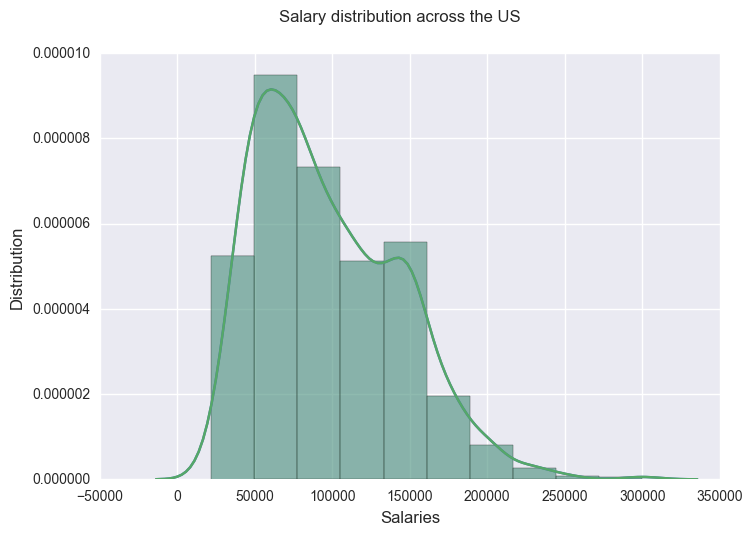

In [21]:
#let's look at the distribution of salaries
sns.distplot(df.salary, bins=10)
fig = sns.distplot(df.salary, bins=10)
fig.figure.suptitle("Salary distribution across the US", fontsize = 12)
plt.xlabel('Salaries', fontsize=12)
plt.ylabel('Distribution', fontsize=12)


In [24]:
#one of the issues with the location data is that everyone seems to have a different way to input where the job is
#so let's clean that, I guess.
df[df.location.str.contains('CA')]

,company,location,salary,summary,title
9,Intechriti,"San Jose, CA",160000.0,Responsibilities for Data Scientist:. Desired ...,Data Scientist (IoT Network Security)
10,Oscar Technology,"San Mateo, CA",150000.0,2-3 years of post-graduate Data Science experi...,Data Scientist - Medical AI
11,Jobspring Partners,"San Jose, CA 95113 (Downtown area)",160000.0,A Silicon Valley based healthcare analytics st...,Data Scientist
12,Tandem Recruiting Group,"Santa Clara, CA",200000.0,Research Scientist -- Computer Vision & Machin...,Senior Machine Learning Scientist
13,TERADEEP INC.,"Campbell, CA",140000.0,Large Scale Data Extraction and Preparation. D...,STAFF DATA SCIENTIST / DEEP LEARNING
14,Lambda Labs,"Palo Alto, CA",165000.0,About us: Lambda Labs is using deep learning t...,iOS Software Engineer (Machine Learning & Arti...
15,Better Staffing Solutions,"Santa Clara, CA",200000.0,Machine Learning Scientist. We are seeking a m...,Machine Learning Scientist
16,TERADEEP INC.,"Campbell, CA",60000.0,Large Scale Data Extraction and Preparation. Y...,Machine Learning / Deep Learning Internship(s)
17,San Mateo County Transit District,"San Carlos, CA 94070",88502.5,Gather and analyze market research data; Repor...,Market Research Analyst
18,EOS DA,"Menlo Park, CA",165000.0,"EOSDA employs over 40 data scientist, computer...",Director Business Development


In [25]:
df['location'] = df['location'].str.replace(r'\d+', '').astype('str')

In [26]:
df['location'] = df['location'].str.replace(r'Midtown area', '').astype('str')

In [27]:
df.head()

,company,location,salary,summary,title
0,SARIAN SOLUTIONS,"Edison, NJ",90000.0,"Processing, cleansing, and verifying the integ...",Data Scientist
1,Rang Technologies Inc.,"Piscataway, NJ",80000.0,Experience in data visualization and presentat...,Data Scientist
2,ResourceHunt Group,"Dayton, NJ",60000.0,20 Daily Analyze data and summarize in form of...,Formulation Scientist
3,Lighthouse Recruiting,"New Brunswick, NJ",150000.0,Join our Medical Laboratory Scientists Groups:...,"Laboratory Director, Toxicology"
4,Workbridge Associates,"New Brunswick, NJ",120000.0,Lead Data Scientist- (Pharmaceuticals). They a...,Lead Data Scientist


In [28]:
df.location.nunique()

300

In [29]:
df[df.location.str.contains("MD")]

,company,location,salary,summary,title
377,Centers for Disease Control and Prevention,"Hyattsville, MD",94872.0,And survey designs for related data collection...,Mathematical Statistician
379,Centers for Disease Control and Prevention,"Hyattsville, MD",89113.0,Analyzing unstructured data; About public heal...,Health Scientist
397,"Intermedia Group, Inc.","Rockville, MD",87500.0,The candidate must have a Masters Degree with ...,BIOSTATISTICIAN / STATISTICAL PROGRAMMER
399,National Security Agency,"Fort George G Meade, MD",75091.5,Use scientific methods to collect and analyze ...,Earned Value Management & Cost Research Analyst
402,National Security Agency,"Fort George G Meade, MD",75091.5,"These include, but are not limited to, problem...",Mathematical Statisticians
403,National Security Agency,"Fort George G Meade, MD",75091.5,"These include, but are not limited to cryptogr...",Mathematicians
404,National Security Agency,"Fort George G Meade, MD",75091.5,"As a Computer Scientist, you may be part of a ...",Software Engineer
405,National Security Agency,"Fort George G Meade, MD",75091.5,"Create computer algorithms, data models, and p...",Cryptologic Computer Scientist
408,Prince George's Community College,"Largo, MD",63863.0,"Under general supervision, responsible for sup...","Research Analyst, Institutional Research and R..."
409,National Security Agency,"Fort George G Meade, MD",76258.5,"Data Structures, Algorithms, and a programming...",Cryptanalytic Computer Network Operations Deve...


In [30]:
#welcome to the second most inefficient code I've ever written
#on the other hand, in a time crunch, it gets the job done.
df.ix[df.location.str.contains("Queens"), 'location'] = "New York, NY"
df.ix[df.location.str.contains("Brooklyn"), 'location'] = "New York, NY"
df.ix[df.location.str.contains("Manhattan"), 'location'] = "New York, NY"
df.ix[df.location.str.contains("Arlington"), 'location'] = "Washington, DC"
df.ix[df.location.str.contains("Chicago"), 'location'] = "Chicago, IL"
df.ix[df.location.str.contains("San Jose"), 'location'] = "San Jose, CA"
df.ix[df.location.str.contains("San Francisco"), 'location'] = "San Francisco, CA"
df.ix[df.location.str.contains("Boston"), 'location'] = "Boston, CA"
df.ix[df.location.str.contains("Charlotte, NC"), 'location'] = "Charlotte, NC"
df.ix[df.location.str.contains("Palo Alto"), 'location'] = "Palo Alto, CA"
df.ix[df.location.str.contains("New York, NY  ()"), 'location'] = "New York, NY"
df.ix[df.location.str.contains("Alexandria"), 'location'] = "Washington, DC"
df.ix[df.location.str.contains("Springfield, VA"), 'location'] = "Washington, DC"
df.ix[df.location.str.contains("Reston, VA"), 'location'] = "Washington, DC"
df.ix[df.location.str.contains("McLean, VA"), 'location'] = "Washington, DC"
df.ix[df.location.str.contains("Washington, DC"), 'location'] = "Washington, DC"

/Users/rb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [31]:
df.location.nunique()

272

In [32]:
df.dtypes

company      object
location     object
salary      float64
summary      object
title        object
dtype: object

In [33]:
#binary variable for salaries above and below the median
df['salary_binary'] = [1 if i >= 88765.0 else 0 for i in df.salary ]

In [34]:
df

,company,location,salary,summary,title,salary_binary
0,SARIAN SOLUTIONS,"Edison, NJ",90000.0,"Processing, cleansing, and verifying the integ...",Data Scientist,1
1,Rang Technologies Inc.,"Piscataway, NJ",80000.0,Experience in data visualization and presentat...,Data Scientist,0
2,ResourceHunt Group,"Dayton, NJ",60000.0,20 Daily Analyze data and summarize in form of...,Formulation Scientist,0
3,Lighthouse Recruiting,"New Brunswick, NJ",150000.0,Join our Medical Laboratory Scientists Groups:...,"Laboratory Director, Toxicology",1
4,Workbridge Associates,"New Brunswick, NJ",120000.0,Lead Data Scientist- (Pharmaceuticals). They a...,Lead Data Scientist,1
5,Smith Arnold Partners,"Princeton, NJ",57500.0,Growing international custom research supplier...,Research Analyst,0
6,"Essential Pharmaceuticals, LLC.","Ewing, NJ",50000.0,Our customers are often the scientists and man...,Bio-Production Sales Associate,0
7,Atrium Staffing,"Cranbury, NJ",92500.0,The Senior Scientist will be responsible for:....,SENIOR SCIENTIST,1
8,Lighthouse Recruiting,"Old Bridge, NJ",90000.0,Join our Medical Laboratory Scientists Groups:...,LCMS Technical Supervisor,1
9,Intechriti,"San Jose, CA",160000.0,Responsibilities for Data Scientist:. Desired ...,Data Scientist (IoT Network Security),1


#### Thought experiment: What is the baseline accuracy for this model?

In [35]:
df.salary_binary.value_counts()

1    601
0    599
Name: salary_binary, dtype: int64

#### Random forest

In [37]:
rf_y = df.salary_binary
rf_x = pd.get_dummies(df.drop(['salary', 'salary_binary','company', 'summary', 'title'], axis=1), drop_first=True)

In [42]:
rf_y.shape

(1200,)

In [43]:
rf_x.shape

(1200, 271)

In [44]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(rf_x, rf_y, random_state = 4, test_size = 0.33)

from sklearn.ensemble import RandomForestClassifier

# cv = StratifiedKFold(Y_train, n_folds=3, shuffle=True, random_state=42)

rf = RandomForestClassifier(max_features='sqrt')


In [50]:

names = ["median and above", "median and below", "predicted above", "predicted below"]

def evaluate_model(model, X, y, names):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=7)
    model = model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
#     print model.score(Y_test, X_test)
    try:
        conmat = np.array(confusion_matrix(Y_test, Y_pred, labels=[1,0]))
        confusion = pd.DataFrame(conmat, index=[names[0:2]],
                         columns=[names[2:]])    
        print confusion
        print(classification_report(Y_test, Y_pred))
    except:
        print "I'm a regressor"
    return "accuracy score is", cross_val_score(model, X_train, Y_train, cv=5, n_jobs=-1).mean()
    


# how did they do?!
evaluate_model(rf, rf_x, rf_y, names)


                  predicted above  predicted below
median and above              135               63
median and below               44              154
             precision    recall  f1-score   support

          0       0.71      0.78      0.74       198
          1       0.75      0.68      0.72       198

avg / total       0.73      0.73      0.73       396



('accuracy score is', 0.73005808603634692)

In [53]:
#let's take a look at the most important features, sorted by highest to lowest!
rf_model = rf.fit(rf_x, rf_y)
name = rf_x.columns
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf_model.feature_importances_), name), reverse=True)

Features sorted by their score:
[(0.0426, 'location_San Francisco, CA'), (0.0414, 'location_Chicago, IL'), (0.0374, 'location_New York, NY'), (0.0368, 'location_San Jose, CA'), (0.0326, 'location_Seattle, WA'), (0.0288, 'location_Charlotte, NC'), (0.0249, 'location_Boston, CA'), (0.0214, 'location_Washington, DC'), (0.0204, 'location_Cambridge, MA'), (0.0203, 'location_Los Alamos, NM'), (0.0169, 'location_Austin, TX'), (0.0161, 'location_Coral Gables, FL'), (0.0149, 'location_Palo Alto, CA'), (0.0141, 'location_Santa Clara, CA'), (0.0125, 'location_Fort George G Meade, MD'), (0.012, 'location_Los Angeles, CA'), (0.01, 'location_Brisbane, CA'), (0.0096, 'location_Portland, OR'), (0.009, 'location_Baltimore, MD'), (0.0089, 'location_Tempe, AZ'), (0.0087, 'location_San Mateo, CA'), (0.0086, 'location_Milpitas, CA '), (0.0082, 'location_Tucson, AZ'), (0.008, 'location_Philadelphia, PA'), (0.0079, 'location_Superior, CO'), (0.0079, 'location_Dearborn, MI'), (0.0077, 'location_Detroit, MI'),

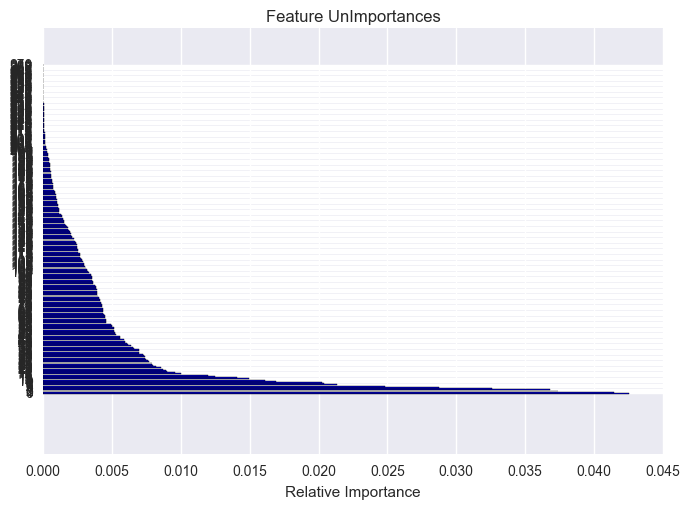

In [54]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.title('Feature UnImportances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)))
plt.xlabel('Relative Importance')
plt.savefig('redacted.png')
plt.show()
#what a great chart!

In [55]:
#creating dummies for if a company has "university" or "department" in the title
df['is_university'] = np.where(df['company'].str.contains("University"), 1, 0)
df['is_government'] = np.where(df['company'].str.contains("Dep"), 1, 0)

In [56]:
df.is_university.value_counts()

0    990
1    210
Name: is_university, dtype: int64

In [57]:
df.is_government.value_counts()

0    1156
1      44
Name: is_government, dtype: int64

In [58]:
#and some more
df['is_manager'] = np.where(df['title'].str.contains("Manager"), 1, 0)
df['is_senior'] = np.where(df['title'].str.contains("Senior"), 1, 0)
df['is_director'] = np.where(df['title'].str.contains("Director"), 1, 0)
df['is_ml'] = np.where(df['title'].str.contains("Machine Learning"), 1, 0)
df['is_predictive'] = np.where(df['title'].str.contains("Predictive"), 1, 0)
df['is_stat'] = np.where(df['title'].str.contains("Statistic"), 1, 0)
#got less accurate here
df['is_python'] = np.where(df['summary'].str.contains("Python", flags=re.IGNORECASE), 1, 0)
df['is_hadoop'] = np.where(df['summary'].str.contains("hadoop", flags=re.IGNORECASE), 1, 0)
df['is_big'] = np.where(df['summary'].str.contains("Big Data", flags=re.IGNORECASE), 1, 0)

In [402]:
df.head()

,company,location,salary,summary,title,salary_binary,is_university,is_government,is_manager,is_senior,is_director,is_ml,is_predictive,is_stat,is_python,is_hadoop,is_spark,is_big
0,SARIAN SOLUTIONS,"Edison, NJ",90000.0,"Processing, cleansing, and verifying the integrity of data used for analysis. Enhancing data collection procedures to include information that is relevant for...",Data Scientist,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Rang Technologies Inc.,"Piscataway, NJ",80000.0,"Experience in data visualization and presentation. Experience/Interest in machine learning, data mining, and predictive analysis....",Data Scientist,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ResourceHunt Group,"Dayton, NJ",60000.0,20 Daily Analyze data and summarize in form of reports. Formulation and process development scientist with 2 - 5 years of experience in the generic drug...,Formulation Scientist,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Lighthouse Recruiting,"New Brunswick, NJ",150000.0,"Join our Medical Laboratory Scientists Groups:. Reviews drug confirmation data from the laboratory, compares with the initial screening data for accuracy and...","Laboratory Director, Toxicology",1,0,0,0,0,1,0,0,0,0,0,0,0
4,Workbridge Associates,"New Brunswick, NJ",120000.0,Lead Data Scientist- (Pharmaceuticals). They are looking for a strong Data Science professional with a Phd. The company that we are working with is one of the...,Lead Data Scientist,1,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
rf_y_f = df.salary_binary
rf_x_f = pd.get_dummies(df.drop(['salary', 'salary_binary','company', 'summary', 'title'], axis=1), drop_first=True)

In [60]:
rf_x_f.shape

(1200, 282)

In [61]:
evaluate_model(rf, rf_x_f, rf_y_f, names)
#that's way more accurate than just using location

                  predicted above  predicted below
median and above              150               48
median and below               41              157
             precision    recall  f1-score   support

          0       0.77      0.79      0.78       198
          1       0.79      0.76      0.77       198

avg / total       0.78      0.78      0.78       396



('accuracy score is', 0.7773110766045549)

In [62]:
rf_model = rf.fit(rf_x_f, rf_y_f)

In [63]:
name = rf_x_f.columns
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf_model.feature_importances_), name), 
             reverse=True)


Features sorted by their score:
[(0.1304, 'is_university'), (0.0395, 'is_senior'), (0.0372, 'is_ml'), (0.0318, 'is_director'), (0.0293, 'is_stat'), (0.0283, 'location_San Francisco, CA'), (0.0246, 'is_big'), (0.0241, 'location_Chicago, IL'), (0.0234, 'location_San Jose, CA'), (0.0233, 'location_New York, NY'), (0.02, 'location_Charlotte, NC'), (0.0197, 'is_manager'), (0.0181, 'location_Washington, DC'), (0.0172, 'is_government'), (0.0158, 'location_Austin, TX'), (0.0154, 'location_Detroit, MI'), (0.0143, 'location_Cambridge, MA'), (0.0137, 'location_Los Alamos, NM'), (0.0118, 'location_Boston, CA'), (0.0113, 'location_Seattle, WA'), (0.0113, 'location_Campbell, CA'), (0.0108, 'location_Fort George G Meade, MD'), (0.0089, 'location_Atlanta, GA'), (0.0087, 'is_hadoop'), (0.0086, 'location_Phoenix, AZ  (Alhambra area)'), (0.0084, 'location_Los Angeles, CA'), (0.0079, 'location_Madison, WI'), (0.0068, 'location_Phoenix, AZ'), (0.0068, 'is_predictive'), (0.0065, 'is_python'), (0.0061, 'loca

#### An exercise in silliness!

Let's run a regressor, just for giggles.

In [66]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor()

print cross_val_score(rfr, rf_x_f, df.salary, cv=5).mean()
print cross_val_score(rfr, rf_x_f, df.salary, cv=5).std()

#while the mean cross-val score is decent, the standard deviation of the scores is pretty large. 

0.508865605928
0.196152633863


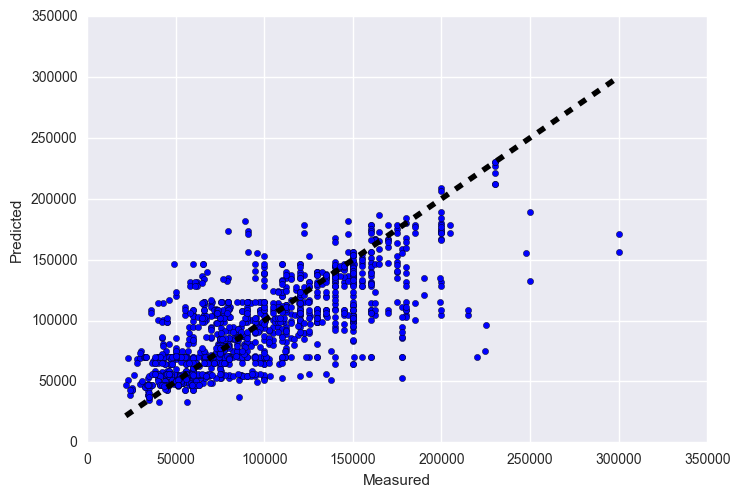

In [67]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(rfr, rf_x_f, df.salary, cv=5)

fig, ax = plt.subplots()
ax.scatter(df.salary, predicted)
ax.plot([df.salary.min(), df.salary.max()], [df.salary.min(), df.salary.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#okay there's a trend of some sort but the classifier gives us a way better indication of where certain salaries should be

In [74]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

evaluate_model(svc, rf_x_f, rf_y_f, names)
#that's not great

                  predicted above  predicted below
median and above              193                5
median and below              130               68
             precision    recall  f1-score   support

          0       0.93      0.34      0.50       198
          1       0.60      0.97      0.74       198

avg / total       0.76      0.66      0.62       396



('accuracy score is', 0.6529527068476344)

In [458]:
evaluate_model(svc, cv_df, rf_y_f, names)

0.759689922481
                  predicted above  predicted below
median and above  97               32             
median and below  30               99             
             precision    recall  f1-score   support

          0       0.76      0.77      0.76       129
          1       0.76      0.75      0.76       129

avg / total       0.76      0.76      0.76       258



### NLP!!

In [69]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

cvec = CountVectorizer(stop_words='english')
model = cvec.fit(df.summary)

# create dataframe on cvec
cv_df  = pd.DataFrame(cvec.transform(df.summary).todense(),
             columns=cvec.get_feature_names())
#show the df
cv_df.transpose().sort_values(0, ascending=False).head(20).transpose()

,data,information,processing,collection,integrity,relevant,used,analysis,procedures,verifying,include,enhancing,cleansing,patients,performance,personable,partnering,person,permit,permanent
0,2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
cvec.fit(df.title)

# create dataframe on cvec
cv_df_t  = pd.DataFrame(cvec.transform(df.summary).todense(),
             columns=cvec.get_feature_names())
#show the df
cv_df_t.transpose().sort_values(0, ascending=False).head(10).transpose()

,data,collection,processing,analysis,procedures,information,integrity,00011w,pharm,pediatrics
0,2,1,1,1,1,1,1,0,0,0
1,2,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0


In [71]:
cv_df_t.sum().sort_values(ascending=False)[0:20]

data           1862
scientist       441
experience      248
analysis        211
research        182
scientists      162
team            150
analytics       119
statistical     116
learning        112
machine         108
senior          104
analyst          84
quality          78
laboratory       76
software         73
big              70
processing       65
science          64
collection       63
dtype: int64

In [75]:
rf.fit(cv_df_t, rf_y_f)
name = cv_df_t.columns
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), name), 
             reverse=True)


Features sorted by their score:
[(0.0533, u'data'), (0.0408, u'analytics'), (0.0393, u'scientist'), (0.0359, u'learning'), (0.0292, u'machine'), (0.0249, u'analysis'), (0.0224, u'research'), (0.0182, u'experience'), (0.0149, u'software'), (0.0149, u'scientists'), (0.0132, u'business'), (0.0131, u'senior'), (0.013, u'big'), (0.0127, u'processing'), (0.0113, u'team'), (0.0113, u'quality'), (0.0101, u'science'), (0.01, u'tools'), (0.0098, u'large'), (0.0098, u'entry'), (0.0092, u'design'), (0.0091, u'statistical'), (0.0087, u'collection'), (0.0086, u'information'), (0.0085, u'visualization'), (0.0085, u'performance'), (0.0085, u'help'), (0.008, u'company'), (0.0078, u'quantitative'), (0.0077, u'management'), (0.0072, u'laboratory'), (0.0068, u'public'), (0.0066, u'hadoop'), (0.0064, u'clinical'), (0.0062, u'support'), (0.0062, u'analytical'), (0.0061, u'mathematical'), (0.0061, u'engineers'), (0.006, u'engineering'), (0.0059, u'health'), (0.0056, u'predictive'), (0.0055, u'study'), (0.005

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#and change the kernel on svc for better NLP 
svc = SVC(kernel='linear')

In [78]:
#with just title, the model is pretty predictive using logistic regression
evaluate_model(lr, cv_df_t, rf_y_f, names)

                  predicted above  predicted below
median and above              156               42
median and below               42              156
             precision    recall  f1-score   support

          0       0.79      0.79      0.79       198
          1       0.79      0.79      0.79       198

avg / total       0.79      0.79      0.79       396



('accuracy score is', 0.77848343685300203)

In [90]:
#with svcs that's gotten slightly better. 
evaluate_model(svc, cv_df_t, rf_y_f, names)

                  predicted above  predicted below
median and above              154               44
median and below               47              151
             precision    recall  f1-score   support

          0       0.77      0.76      0.77       198
          1       0.77      0.78      0.77       198

avg / total       0.77      0.77      0.77       396



('accuracy score is', 0.79099129667970247)

In [80]:
#whoo random forest!!
evaluate_model(rf, cv_df_t, rf_y_f, names)

                  predicted above  predicted below
median and above              156               42
median and below               25              173
             precision    recall  f1-score   support

          0       0.80      0.87      0.84       198
          1       0.86      0.79      0.82       198

avg / total       0.83      0.83      0.83       396



('accuracy score is', 0.81460183268154274)

In [81]:
cv_df.sum().sort_values(ascending=False)[0:20]

data           1862
scientist       441
experience      248
analysis        211
research        182
scientists      162
looking         150
team            150
analytics       119
statistical     116
learning        112
machine         108
senior          104
work             91
analyst          84
position         81
join             80
working          79
quality          78
laboratory       76
dtype: int64

In [82]:
rf.fit(cv_df, rf_y_f)
name = cv_df.columns
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), name), 
             reverse=True)


Features sorted by their score:
[(0.0328, u'looking'), (0.0217, u'analytics'), (0.0161, u'learning'), (0.0146, u'machine'), (0.0126, u'research'), (0.012, u'senior'), (0.0118, u'data'), (0.0117, u'analysis'), (0.0116, u'company'), (0.0093, u'experience'), (0.009, u'scientist'), (0.0085, u'opportunity'), (0.0084, u'leading'), (0.0083, u'science'), (0.008, u'big'), (0.0077, u'hadoop'), (0.0074, u'build'), (0.0071, u'entry'), (0.007, u'new'), (0.007, u'investment'), (0.0068, u'predictive'), (0.0062, u'health'), (0.006, u'reports'), (0.0059, u'large'), (0.0058, u'collection'), (0.005, u'natural'), (0.0047, u'control'), (0.0046, u'working'), (0.0044, u'team'), (0.0044, u'global'), (0.0044, u'client'), (0.0043, u'lead'), (0.0042, u'sr'), (0.0042, u'knowledge'), (0.0041, u'come'), (0.0041, u'analyze'), (0.004, u'startup'), (0.004, u'solving'), (0.004, u'analyzing'), (0.0039, u'implementing'), (0.0039, u'credit'), (0.0038, u'experienced'), (0.0036, u'processing'), (0.0036, u'information'), (0.

In [91]:
#and with summaries
evaluate_model(svc, cv_df, rf_y_f, names)
#not bad at all!

                  predicted above  predicted below
median and above              161               37
median and below               35              163
             precision    recall  f1-score   support

          0       0.81      0.82      0.82       198
          1       0.82      0.81      0.82       198

avg / total       0.82      0.82      0.82       396



('accuracy score is', 0.84697003680699334)

In [84]:
#logistic regression is doing wonderfully
evaluate_model(lr, cv_df, rf_y_f, names)

                  predicted above  predicted below
median and above              171               27
median and below               36              162
             precision    recall  f1-score   support

          0       0.86      0.82      0.84       198
          1       0.83      0.86      0.84       198

avg / total       0.84      0.84      0.84       396



('accuracy score is', 0.8556427804616209)

In [85]:
#as is random forest
evaluate_model(rf, cv_df, rf_y_f, names)

                  predicted above  predicted below
median and above              148               50
median and below               16              182
             precision    recall  f1-score   support

          0       0.78      0.92      0.85       198
          1       0.90      0.75      0.82       198

avg / total       0.84      0.83      0.83       396



('accuracy score is', 0.85314278046162106)

### Making cents of pay scales: a report on data science salaries

#### Executive summary:
This report explores salaries for data science jobs across the United States in order to determine the key factors affecting whether or not a particular job’s salary would be above or below the national median. Preliminary results indicate that location plays a role in establishing salary, as does the seniority of the position, and the specific components of the job. Recommendations for a job in DC are to generally pay above the median, especially for non entry-level roles.

#### Brief Introduction
Data science has become an increasingly popular profession in recent years, with an increasing number of non-data specific industries seeing the value of adding targeted quantitative analysis to make their business models more robust. As such, national surveys and statistics on data scientist salary scales are a relatively new phenomenon, with O’Reilly’s report (the industry standard) only having run for four years to date. The O’Reilly survey has established that there is a positive correlation between the number of tools used by data scientists and salary. There is also a positive correlation between the use of open source tools and higher salaries.

As our company expands, the need to fill more data-specific roles grows. At present, there is no established salary scale for data science positions at Skynet, which has made it more difficult to be competitive in the hiring market. This report seeks to establish a national median salary and determine what factors most affect the salary associated with a given position. Given the changing scope of the data science field, a “Data Scientist” includes all positions that make use of data and analytics in their job description.

#### Methods
This research was conducted by gathering over 30,000 entries from Indeed.com on job title, job location, company name, and job summary. The information was first gathered from a focused set of cities, both the 10 most populous cities in the U.S. and the best places to work as a data scientist in 2016. This was then expanded to include every state in the U.S. The ensuing database was then reduced to only include positions that included a salary or salary range, and then reduced further to only include salary ranges that were monthly or annual.
The final database of 780 observations was then assessed to determine a median. We created several classification models to determine what key factors (including location, key words, and job title) affect a job being above or below the median salary.

#### What we found
The median salary we found was roughly \$85,000, higher than Indeed.com’s national median of \$79,000, but lower than O’Reilly’s median of \$87,000. Jobs in Washington, DC in particular are 71 percent more likely to be above the median than below.

Of particular significance in determining whether or not a job would be above the median included whether or not the position had the term “Machine Learning” in the title, whether or not the role explicitly called for a statistician, and whether or not the position would include working with big data. Of consideration is also the seniority of the position, and where the job is located.  

The model developed can be used to test potential job postings (based on the job title, location, and summary) to determine (with roughly 78 percent accuracy) whether the salary associated with the position should be above or below the median.

#### Recommendations going forward
Skynet should establish a data science pay scale for each specific location it chooses to establish data science positions in. The pay scale should then factor in the position level, as well as what skills and job responsibilities will be associated with the position. Jobs that require a larger number of tools and include programming-heavy skills (like working with machine learning and big data) should also be on the higher end of the pay scale. 

Further research should be done to take a deeper dive into how specific qualifications, years of experience, and knowledge of specific tools affect pay scales. The classification model should also be expanded to predict specific salary ranges rather than whether or not a job is above or below the median salary.

#### Conclusion
Determining salary ranges can be an extremely complex endeavor, especially in a field as young as data science. However, given the overall company budget and the immediate need for talented data scientists in the Washington, DC area, human resources should consider offering starting salaries of $85,000 and potentially increasing this based on the specific job requirements.
